In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Create clustermap

In [2]:
# Load orthology matrix
ortho_matrix = pd.read_csv('../tables/ortho_matrix.csv')
ortho_matrix.set_index('Unnamed: 0', inplace=True)
ortho_matrix = ortho_matrix.T
ortho_matrix.head()

strain_info = pd.read_csv('../tables/strain_info.csv', usecols=[1,2,3])

# Merge ortho_matrix with strain_info
df = pd.merge(strain_info, ortho_matrix, left_on='NCBI ID', right_index=True)
df = df.drop('NCBI ID', axis=1).set_index('Strain')
df = df.sort_values('Pathotype').drop('Pathotype', axis=1)
df

,CIW80_00005,CIW80_00010,CIW80_00015,CIW80_00020,CIW80_00025,CIW80_00030,CIW80_00035,CIW80_00040,CIW80_00045,CIW80_00050,...,CIW80_25750,CIW80_25755,CIW80_25760,CIW80_25765,CIW80_25770,CIW80_25775,CIW80_25780,CIW80_25785,CIW80_25790,CIW80_25795
Strain,,,,,,,,,,,,,,,,,,,,,
Escherichia coli SE15,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
Escherichia coli str. K-12 substr. W3110,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
Escherichia coli SE11,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
Escherichia coli KO11FL,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
Escherichia coli IAI1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
Escherichia coli HS,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
Escherichia coli ED1a,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
Escherichia coli DH1 ME8569,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
Escherichia coli DH1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


C:\Users\maxvan\AppData\Local\Continuum\anaconda3\envs\EcN_model\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


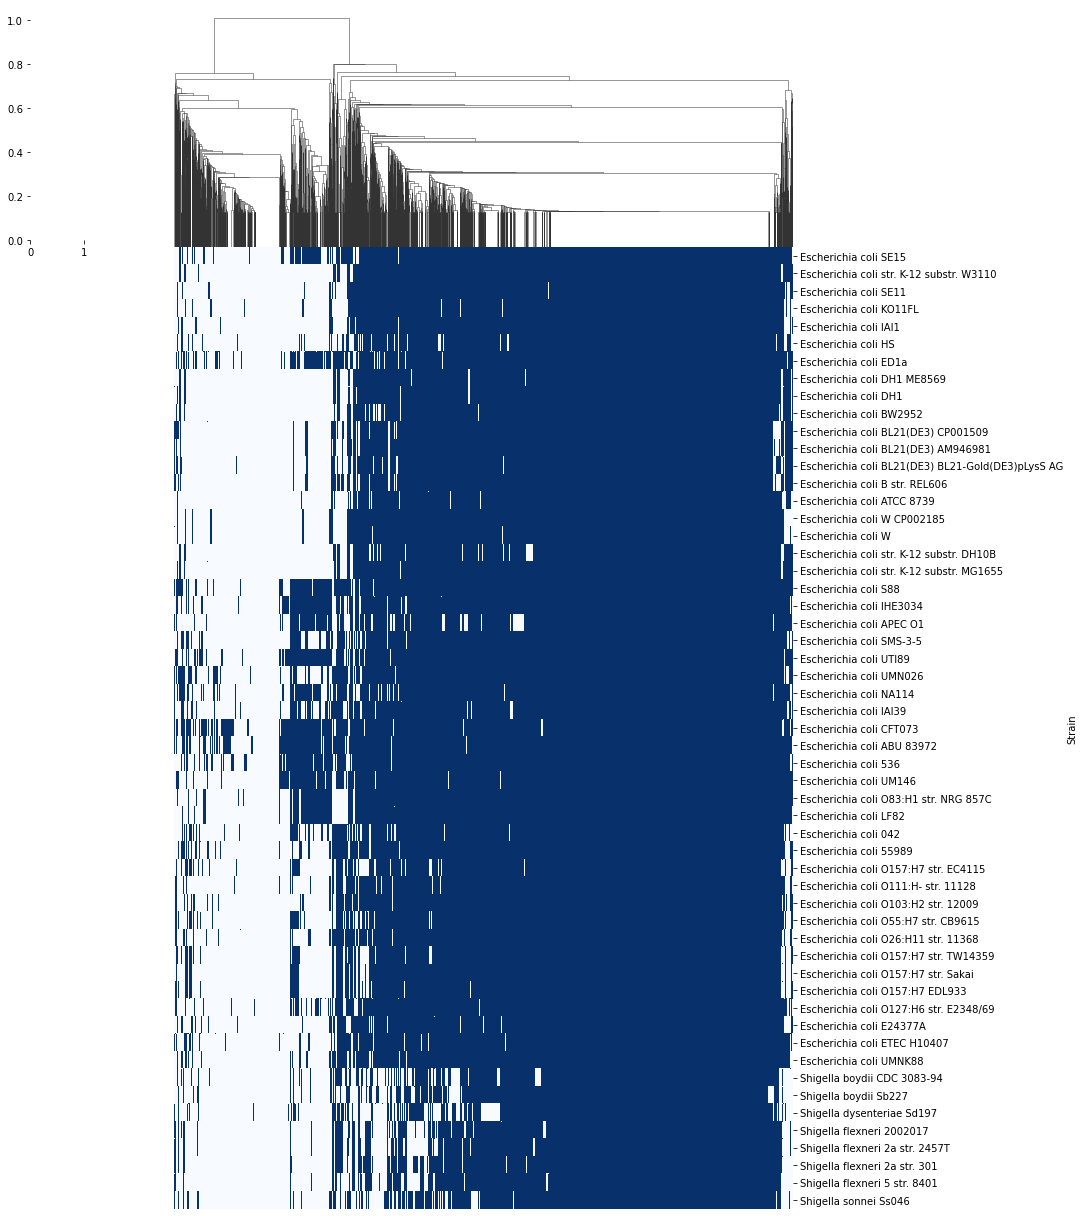

In [3]:
# Create a first clustermap
result = sns.clustermap(df, xticklabels=False, row_cluster=False, cbar=False, cmap="Blues", figsize=(15,17))

Remove colorbar: https://github.com/mwaskom/seaborn/issues/471

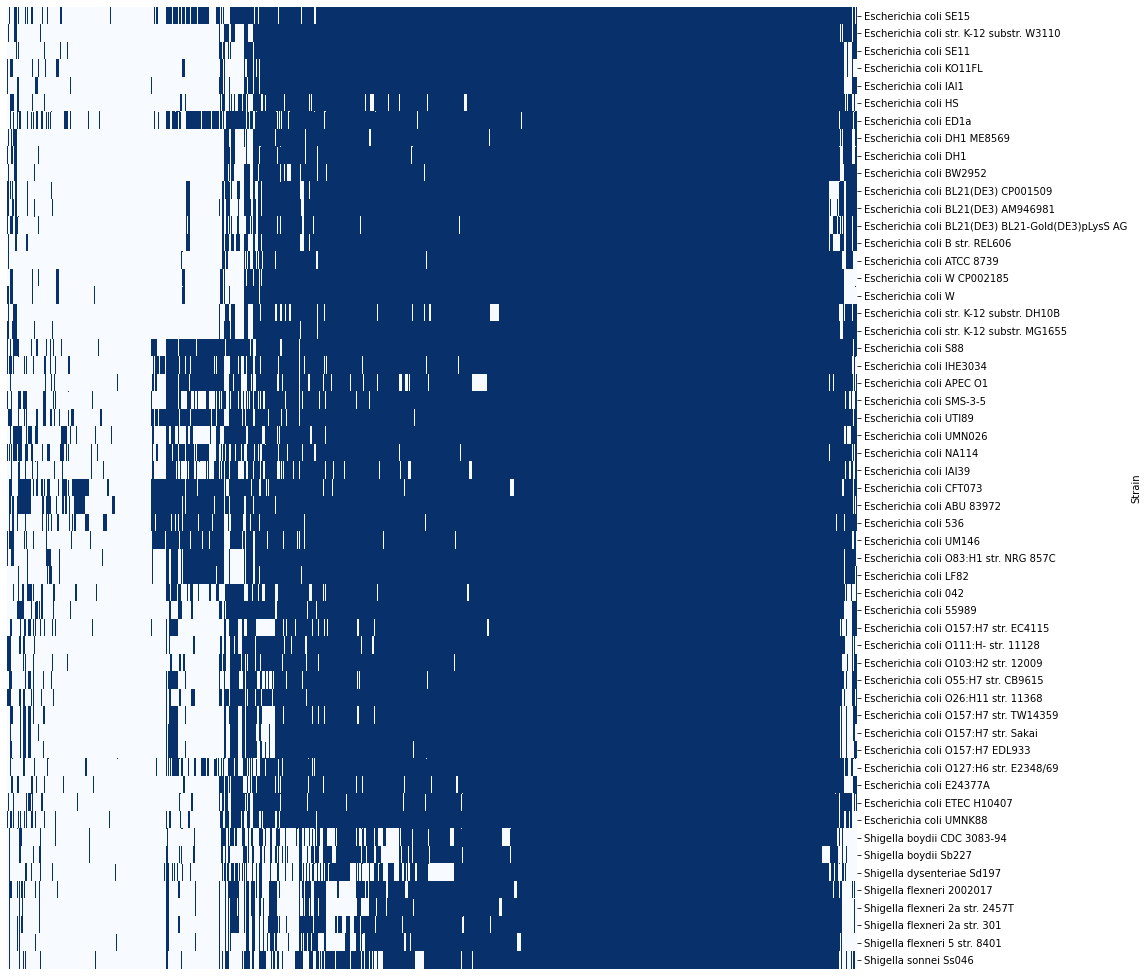

In [4]:
# Take the clustering from the first clustermap
result_df = result.data2d

# Create a new figure with the same order, but without the lines/clustering
cm = sns.clustermap(result_df, xticklabels=False, row_cluster=False, col_cluster=False, cmap="Blues", figsize=(19,17))
cm.cax.set_visible(False)
cm.ax_row_dendrogram.set_visible(False)
cm.ax_col_dendrogram.set_visible(False)

cm.savefig('../figures/clustermap.png', dpi=600)